<a href="https://colab.research.google.com/github/sezinbiner/Covid_X_ray_Classification/blob/main/vgg16_and_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "/content/gdrive/MyDrive/bitirme dataset/train"
test_dir = "/content/gdrive/MyDrive/bitirme dataset/test"
validation_dir = "/content/gdrive/MyDrive/bitirme dataset/validation"
class_names = ['covid', 'normal']
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        shuffle=True,
        class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        shuffle=True,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary')

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1232 images belonging to 2 classes.


In [ ]:
def extract_features(number_of_images, generator, batch_size):
  features = np.zeros(shape=(number_of_images, extraction_layer.output_shape[1], extraction_layer.output_shape[2], extraction_layer.output_shape[3]))
  labels = np.zeros(shape=(number_of_images))
  i = 0
  print("loop")
  for inputs_batch, labels_batch in generator:
      #print(i)
      features_batch = extraction_layer.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= number_of_images:
          break
  print("loop over")
  return features, labels

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import  InceptionV3
import numpy as np

extraction_layer = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_layer.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
train_features_VGG16, train_labels_VGG16 = extract_features(4800, train_generator, 20)
validation_features_VGG16, validation_labels_VGG16 = extract_features(1200, validation_generator, 20)
test_features_VGG16, test_labels_VGG16 = extract_features(1232, test_generator, 1)

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import  InceptionV3
from tensorflow.python.keras.applications.nasnet import NASNetMobile
import numpy as np

extraction_layer = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_layer.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
train_features_VGG19, train_labels_VGG19 = extract_features2(4800, train_generator, 20)
validation_features_VGG19, validation_labels_VGG19 = extract_features2(1200, validation_generator, 20)
test_features_VGG19, test_labels_VGG19 = extract_features2(1232, test_generator, 1)

In [ ]:
features = np.concatenate([train_features_VGG16, train_features_VGG19], 1)
print(features.size)

In [ ]:
val_features = np.concatenate([validation_features_VGG16,validation_features_VGG19], 1)
print(val_features.size)

In [ ]:
test_features = np.concatenate([test_features_VGG16,test_features_VGG19], 1)
print(test_features.size)

In [ ]:
from keras.models import Sequential
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer= "adam" ,
    metrics=['accuracy']
)

In [ ]:
from keras.callbacks import Callback, ModelCheckpoint
model_checkpoint = ModelCheckpoint('/content/gdrive/My Drive/models/vgg16.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


In [ ]:
history = model.fit(features, train_labels_VGG16,
                    epochs=15,
                    batch_size=20,
                    validation_data=(val_features, validation_labels_VGG16),
                    callbacks=[model_checkpoint])

Epoch 1/15
300/300 [==============================] - 3s 6ms/step - loss: 1.2519 - accuracy: 0.6773 - val_loss: 0.3634 - val_accuracy: 0.8842

Epoch 00001: val_loss improved from inf to 0.36342, saving model to /content/gdrive/My Drive/models/vgg16.h5
Epoch 2/15
300/300 [==============================] - 1s 5ms/step - loss: 0.4531 - accuracy: 0.7522 - val_loss: 0.2720 - val_accuracy: 0.9108

Epoch 00002: val_loss improved from 0.36342 to 0.27200, saving model to /content/gdrive/My Drive/models/vgg16.h5
Epoch 3/15
300/300 [==============================] - 1s 5ms/step - loss: 0.3936 - accuracy: 0.7897 - val_loss: 0.1847 - val_accuracy: 0.9408

Epoch 00003: val_loss improved from 0.27200 to 0.18467, saving model to /content/gdrive/My Drive/models/vgg16.h5
Epoch 4/15
300/300 [==============================] - 1s 5ms/step - loss: 0.3788 - accuracy: 0.8026 - val_loss: 0.1963 - val_accuracy: 0.9333

Epoch 00004: val_loss did not improve from 0.18467
Epoch 5/15
300/300 [======================

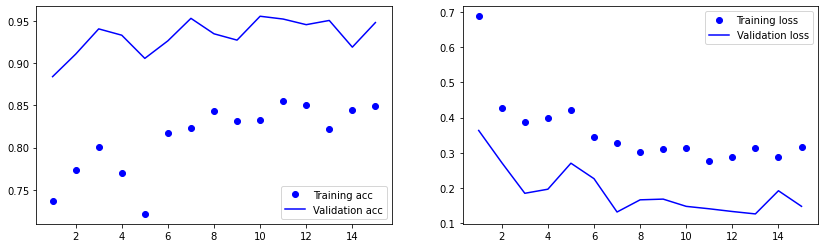

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [ ]:
from sklearn import metrics
y_pred = model.predict(test_features)
probas = np.array(y_pred)
labels = []
for prob in probas:
  if prob < 0.5:
    labels.append(0)
  else:
    labels.append(1)
y_true_labels = test_labels_VGG16
y_pred_labels = labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true_labels, y_pred_labels,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print('F1 score: %f' % f1)
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels, target_names=["covid", "normal"]))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true_labels, y_pred_labels)

Accuracy: 0.953734
Precision: 0.953734
Recall: 0.953734
F1 score: 0.953723
              precision    recall  f1-score   support

       covid       0.94      0.97      0.95       616
      normal       0.97      0.94      0.95       616

    accuracy                           0.95      1232
   macro avg       0.95      0.95      0.95      1232
weighted avg       0.95      0.95      0.95      1232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([[597,  19],
       [ 38, 578]])